# Shipwrecks and Dive Sites of Massachusetts

The code demo part of a presentation made to the Boston Python User Group on December 16, 2020.

This notebook features the GeoPandas package as well as visualizations created with folium. It covers basic geospatial functions like data imports, creating a `GeoDataFrame`, mapping points, and geocoding.

## Import Packages

In [1]:
import requests
import pandas as pd
import geopandas as gpd
import shapely

import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

## Retrieve Data

The two datasets used for this project are:

1. The API response from [DiveSites.com](http://api.divesites.com/docs/) for a set of recreational SCUBA diving sites within 50 nautical miles of Boston, MA
2. A KML file converted to a shapefile from [Wikipedia](https://en.wikipedia.org/wiki/List_of_shipwrecks_of_Massachusetts) with coordinates for a subset of their listed ship wrecks of Massachusetts

In [3]:
# Get data from DiveSites.com API
ds_url = "http://api.divesites.com/?mode=sites&lat=42.35843&lng=-71.05977&dist=100"
r_ds = requests.get(ds_url)
ds_json = r_ds.json()

In [4]:
#ds_json  # Uncomment and run to see full JSON structure

The JSON top-level structure is:

```py
{'request': {...}
 'sites': [{}, {}, ...]
 'version': 1,
 'loc': {'lat': '42.35843', 'lng': '-71.05977'},
 'result': True}
```

The dive sites are stored under the `sites` key as a list of objects, each with the form:

```py
{'currents': None,
 'distance': '8.85',
 'hazards': None,
 'lat': '42.4196',
 'name': 'Chimneys',
 'water': None,
 'marinelife': None,
 'description': None,
 'maxdepth': None,
 'mindepth': None,
 'predive': None,
 'id': '21163',
 'equipment': None,
 'lng': '-70.9074'}
```

In [5]:
len(ds_json['sites'])

92

In [6]:
# Create temporary DataFrame of Mass dive sites
ds_tmp_df = pd.DataFrame(ds_json['sites'])

ds_tmp_df.head()

,currents,distance,hazards,lat,name,water,marinelife,description,maxdepth,mindepth,predive,id,equipment,lng
0,None,8.85,None,42.4196,Chimneys,None,None,None,None,None,None,21163,None,-70.9074
1,None,8.87,None,42.4227,40 Steps,None,None,None,None,None,None,21164,None,-70.9093
2,None,8.98,None,42.3738,Romance,None,None,None,None,None,None,22878,None,-70.8852
3,None,16.74,None,42.3842,Baleen Wreck,None,None,None,None,None,None,16771,None,-70.7337
4,None,17.34,None,42.2403,Minot Beach,None,None,None,None,None,None,22299,None,-70.7605


In [7]:
# Convert to GeoDataFrame
ds_df = gpd.GeoDataFrame(ds_tmp_df,
                         geometry=gpd.points_from_xy(
                             ds_tmp_df.lng,
                             ds_tmp_df.lat))

# Set CRS - web data usually uses WGS84, which is EPSG code 4326
ds_df.crs = 'EPSG:4326'  # Alternative way: ds_df.to_crs(epsg=4326)

ds_df

,currents,distance,hazards,lat,name,water,marinelife,description,maxdepth,mindepth,predive,id,equipment,lng,geometry
0,None,8.85,None,42.4196,Chimneys,None,None,None,None,None,None,21163,None,-70.9074,POINT (-70.90740 42.41960)
1,None,8.87,None,42.4227,40 Steps,None,None,None,None,None,None,21164,None,-70.9093,POINT (-70.90930 42.42270)
2,None,8.98,None,42.3738,Romance,None,None,None,None,None,None,22878,None,-70.8852,POINT (-70.88520 42.37380)
3,None,16.74,None,42.3842,Baleen Wreck,None,None,None,None,None,None,16771,None,-70.7337,POINT (-70.73370 42.38420)
4,None,17.34,None,42.2403,Minot Beach,None,None,None,None,None,None,22299,None,-70.7605,POINT (-70.76050 42.24030)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,None,94.05,None,43.5648,Twin Lights,None,None,None,None,None,None,21137,None,-70.1984,POINT (-70.19840 43.56480)
88,None,95.65,None,41.0236,USS Bass Wreck,None,None,None,None,None,None,16506,None,-71.5506,POINT (-71.55060 41.02360)
89,None,96.00,None,41.0189,Bass (USS Bass),None,None,None,None,None,None,23562,None,-71.5532,POINT (-71.55320 41.01890)
90,None,97.45,None,43.6256,Fort Williams / Ships Cove,None,None,None,None,None,None,22706,None,-70.2132,POINT (-70.21320 43.62560)


In [8]:
# Double check CRS
ds_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# Check for missing data
ds_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   currents     0 non-null      object  
 1   distance     92 non-null     object  
 2   hazards      0 non-null      object  
 3   lat          92 non-null     object  
 4   name         92 non-null     object  
 5   water        0 non-null      object  
 6   marinelife   0 non-null      object  
 7   description  0 non-null      object  
 8   maxdepth     0 non-null      object  
 9   mindepth     0 non-null      object  
 10  predive      0 non-null      object  
 11  id           92 non-null     object  
 12  equipment    0 non-null      object  
 13  lng          92 non-null     object  
 14  geometry     92 non-null     geometry
dtypes: geometry(1), object(14)
memory usage: 10.9+ KB


In [10]:
# Clean GeoDataFrame to combine with shipwrecks

# Drop all columns except name and geometry
ds_df = ds_df.loc[:, ['name', 'geometry']]

# Add a column saying each point is a dive site
ds_df['point_type'] = 'divesite'

# Check GDF structure
ds_df.head()

,name,geometry,point_type
0,Chimneys,POINT (-70.90740 42.41960),divesite
1,40 Steps,POINT (-70.90930 42.42270),divesite
2,Romance,POINT (-70.88520 42.37380),divesite
3,Baleen Wreck,POINT (-70.73370 42.38420),divesite
4,Minot Beach,POINT (-70.76050 42.24030),divesite


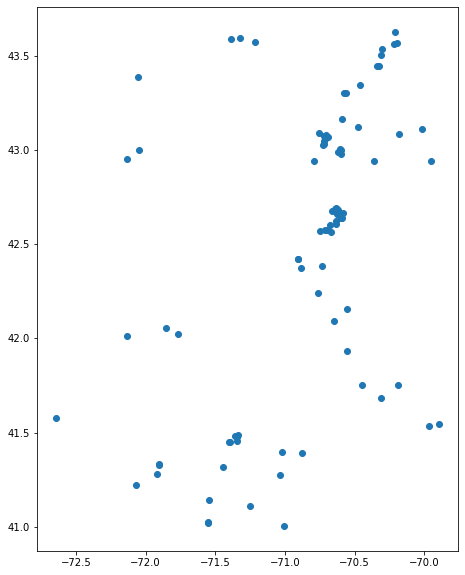

In [12]:
# Plot geography with no projection or basemap
ds_df.plot(figsize=(12, 10));

In [13]:
# Convert CRS to web-tile CRS (Web Mercator)
ds_df_tomap = ds_df.to_crs(epsg=3857)

In [14]:
ds_df_tomap.head()

,name,geometry,point_type
0,Chimneys,POINT (-7893375.661 5224042.202),divesite
1,40 Steps,POINT (-7893587.169 5224509.673),divesite
2,Romance,POINT (-7890904.369 5217138.379),divesite
3,Baleen Wreck,POINT (-7874039.466 5218705.617),divesite
4,Minot Beach,POINT (-7877022.828 5197043.462),divesite


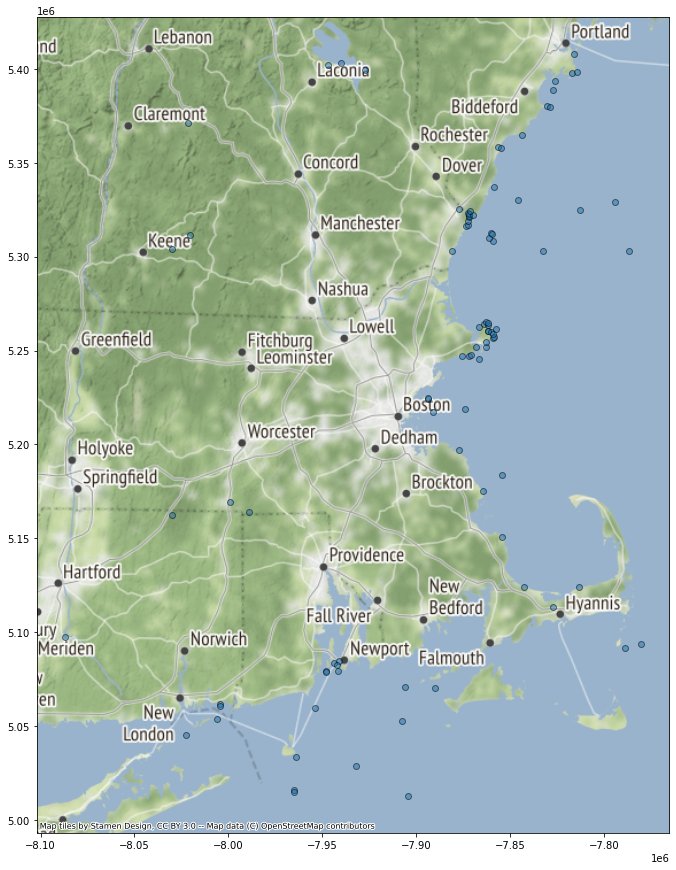

In [15]:
# Add a basemap using contextily web tiles and plot points
ax = ds_df_tomap.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [16]:
# Create GeoDataFrame of Mass shipwrecks
sw_df = gpd.read_file('./Data/MA_Shipwrecks_AllCounties.shp', driver='shapefile')

# Drop Z dimension of polygons that occurs often in the .kml format
sw_df.geometry = sw_df.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y, z: (x, y), polygon))

sw_df

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,snippet,geometry
0,Dixie Sword,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-69.98056 41.54944)
1,SS James Longstreet,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-70.04424 41.83146)
2,USS Merrimack (1798),"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-69.74900 42.12600)
3,Pendleton,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-69.96250 41.58611)
4,HMS Somerset,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-70.14806 42.07611)
5,Whydah Gally,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-69.95944 41.89194)
6,Angela,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-71.03389 41.46111)
7,City of Taunton (ship),"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-71.17583 41.71083)
8,Colonel Willam B. Cowlin,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-70.98000 41.47167)
9,Hilda Garston,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-71.03500 41.27333)


In [17]:
# Check for missing data
sw_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        49 non-null     object  
 1   descriptio  49 non-null     object  
 2   timestamp   0 non-null      object  
 3   begin       0 non-null      object  
 4   end         0 non-null      object  
 5   altitudeMo  0 non-null      object  
 6   tessellate  49 non-null     int64   
 7   extrude     49 non-null     int64   
 8   visibility  49 non-null     int64   
 9   drawOrder   0 non-null      object  
 10  icon        0 non-null      object  
 11  snippet     0 non-null      object  
 12  geometry    49 non-null     geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 5.1+ KB


In [19]:
# Clean GeoDataFrame to combine with dive sites

# Remove erroneous point for SS North American (in Lake Michigan)
sw_df.drop(index=35, inplace=True)

# Drop all columns except name and geometry
sw_df = sw_df.loc[:, ['Name', 'geometry']]

# Change column "Name" to "name" to align with dive sites cols
sw_df = sw_df.rename(columns={"Name":"name"})

# Add a column saying each point is a shipwreck
sw_df['point_type'] = 'shipwreck'

# Check GDF structure
sw_df.head()

,name,geometry,point_type
0,Dixie Sword,POINT (-69.98056 41.54944),shipwreck
1,SS James Longstreet,POINT (-70.04424 41.83146),shipwreck
2,USS Merrimack (1798),POINT (-69.74900 42.12600),shipwreck
3,Pendleton,POINT (-69.96250 41.58611),shipwreck
4,HMS Somerset,POINT (-70.14806 42.07611),shipwreck


In [20]:
# Check length (make sure erroneous point was removed)
len(sw_df)

48

In [21]:
# Check CRS
sw_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
# Convert CRS to web-tile CRS (Web Mercator)
sw_df_tomap = sw_df.to_crs(epsg=3857)

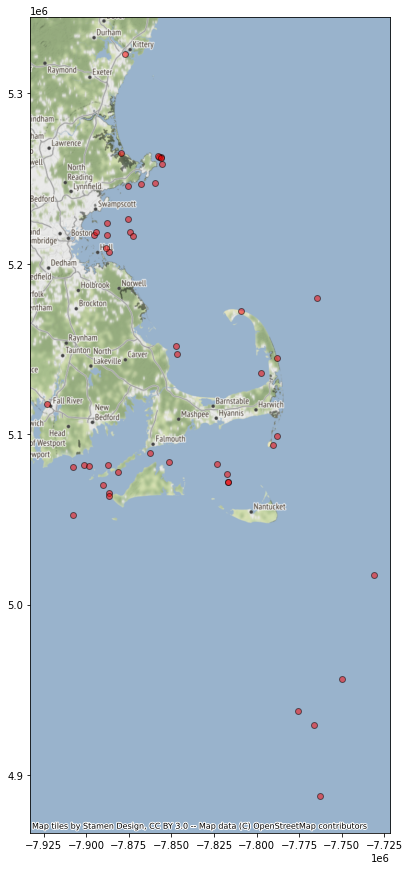

In [23]:
# Add a basemap using contextily web tiles and plot points
ax2 = sw_df_tomap.plot(figsize=(15, 15), color='red', alpha=0.5, edgecolor='k')
ctx.add_basemap(ax2)

## Combine GeoDataFrames

The GeoDataFrames now both have the same column names in the same order, and are based on the same projection (Web Mercator). Combining them is a simple `.append()` call in pandas.

In [29]:
# Check the columns are in the same order
print(f'Dive Sites cols: {ds_df_tomap.columns}')
print(f'Shipwreck cols: {sw_df_tomap.columns}')

Dive Sites cols: Index(['name', 'geometry', 'point_type'], dtype='object')
Shipwreck cols: Index(['name', 'geometry', 'point_type'], dtype='object')


In [30]:
# Concatenate GeoDataFrames
full_df = ds_df_tomap.append(sw_df_tomap, ignore_index=True)

full_df

,name,geometry,point_type
0,Chimneys,POINT (-7893375.661 5224042.202),divesite
1,40 Steps,POINT (-7893587.169 5224509.673),divesite
2,Romance,POINT (-7890904.369 5217138.379),divesite
3,Baleen Wreck,POINT (-7874039.466 5218705.617),divesite
4,Minot Beach,POINT (-7877022.828 5197043.462),divesite
...,...,...,...
135,City of Salisbury (ship),POINT (-7888068.196 5217151.773),shipwreck
136,Coyote,POINT (-7872328.856 5216314.678),shipwreck
137,Davis Palmer,POINT (-7895303.962 5216858.781),shipwreck
138,Kiowa,POINT (-7888593.871 5209327.825),shipwreck


In [34]:
# Quick check to see if any shipwrecks are also dive sites
for row in full_df['name'].sort_values():
    print(row)

40 Steps
Ada K. Damon (1871)
Alice M. Lawrence
Alma A. E. Holmes (ship)
Angela
Appledore Island
Ardandhu
Back Beach
Baleen (ship)
Baleen Wreck
Barge & Crane
Bass (USS Bass)
Bass Rocks
Beaver Tail Park
Beavertail State Park
Biddeford Pool
Biddeford Pool, ME
Bigelow Hollow
Black Point
Brant Rock
Brownstone Quarry
California (trawler)
Cathedral Rocks
Charles S Haight Wreck
Charles S. Haight
Chelsea (ship)
Chester Poling Wreck
Chimneys
City of Salisbury (ship)
City of Taunton (ship)
Clark’s Point
Colonel Willam B. Cowlin
Corporation Beach
Coyote
Davis Palmer
Dixie Sword
Dixie Sword Wreck
Duck Island
Dynafuel
Edward Rich
Empire Knight, at Boone Is
Fisher’s Island
Folly Cove
Fort Adams
Fort Foster
Fort McClary
Fort Stark
Fort Wetherill
Fort Williams / Ships Cove
French Van Gilder
Front Beach
German submarine U-550
Great Island Commons
Great Island Commons
HMS Somerset
Halibut Point
Hart.s Cove
Hathaways Pond
Henry Endicott
Herbert
Herman Winter
Hilda Garston
Hilda Garston Wreck
Hoop Pole Cov